<a href="https://colab.research.google.com/github/pskuntal/DL---Deep-Learning/blob/main/001_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Model

Importing Libraries

In [20]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing Data

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

Data Checks/Preprocessing

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

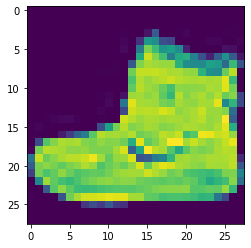

In [7]:
plt.imshow(x_train[0])

In [8]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

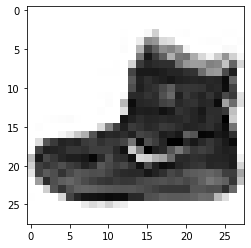

In [10]:
plt.imshow(x_train[0], cmap="Greys")

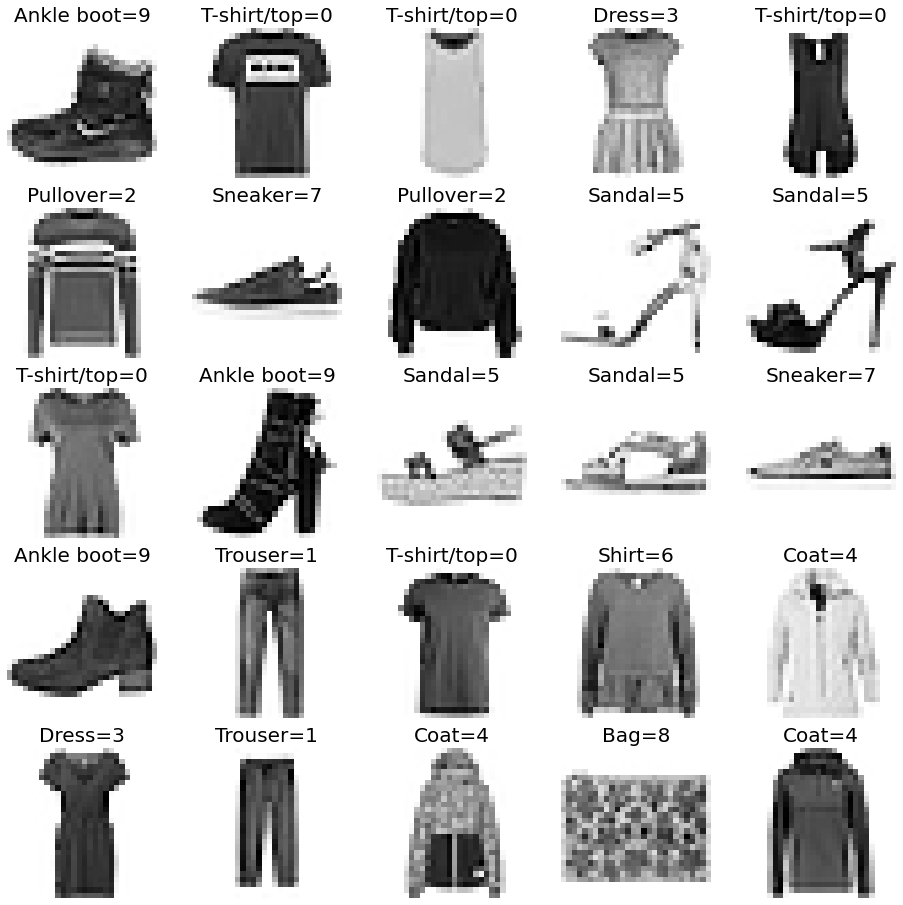

In [11]:
plt.figure(figsize = (16, 16))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap="Greys")
  plt.axis("off")
  plt.title(class_labels[y_train[i]] + "=" + str(y_train[i]), fontsize=20)

Feature Scaling

In [14]:
x_train_fs = x_train/255
x_test_fs = x_test/255

In [22]:
x_train[0][10], x_train_fs[0][10]

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0], dtype=uint8),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.75686275, 0.89411765,
        0.85490196, 0.83529412, 0.77647059, 0.70588235, 0.83137255,
        0.82352941, 0.82745098, 0.83529412, 0.8745098 , 0.8627451 ,
        0.95294118, 0.79215686, 0.        ]))

Building Neural Network

In [23]:
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape = [28, 28]),
                         keras.layers.Dense(units = 32, activation = "relu"),
                         keras.layers.Dense(units = 10, activation = "softmax")
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [26]:
model.fit(x_train_fs, y_train, epochs=51)

Epoch 1/51
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5444 - accuracy: 0.8119
Epoch 2/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4117 - accuracy: 0.8542
Epoch 3/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3804 - accuracy: 0.8636
Epoch 4/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3604 - accuracy: 0.8732
Epoch 5/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3426 - accuracy: 0.8772
Epoch 6/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3310 - accuracy: 0.8813
Epoch 7/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.8832
Epoch 8/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3104 - accuracy: 0.8880
Epoch 9/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3030 - accuracy: 0.8892
Epoch 10/51
1875/1875 [==============================] - 3s 2ms/step - loss: 0.296

In [27]:
model.evaluate(x_test_fs, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4190 - accuracy: 0.8762


[0.41896313428878784, 0.8762000203132629]

In [30]:
y_pred = model.predict(x_test_fs)

In [32]:
class_labels[np.argmax(y_pred[0])], class_labels[y_test[0]]

('Ankle boot', 'Ankle boot')

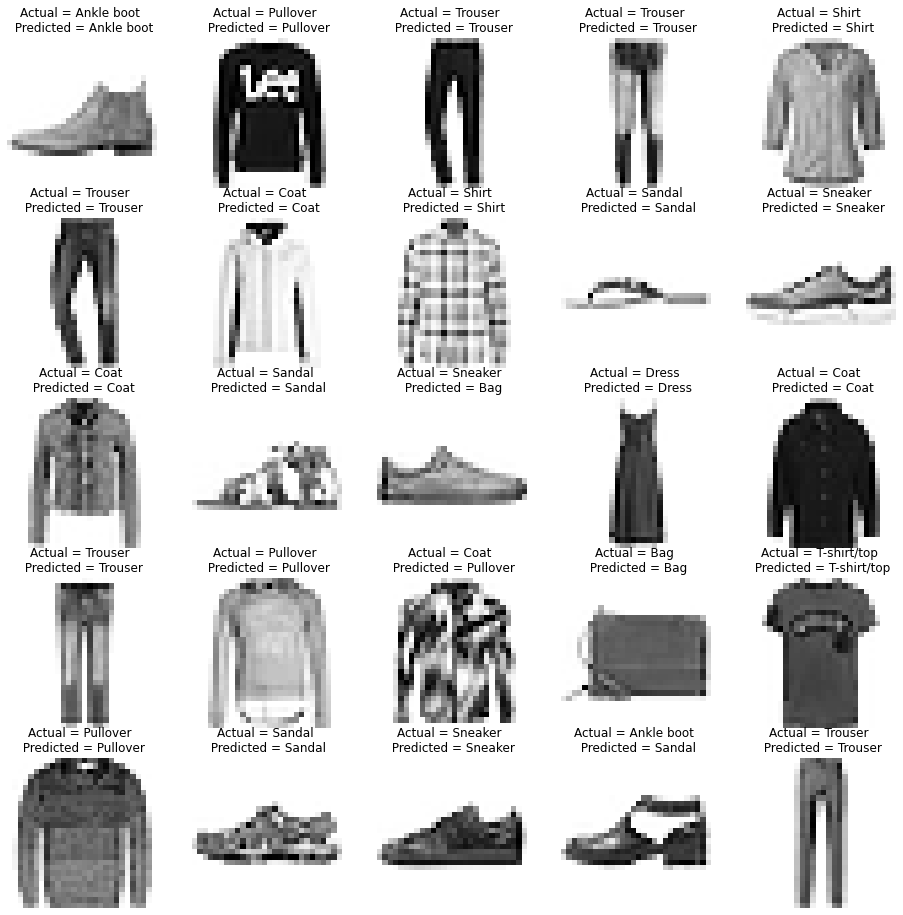

In [33]:
plt.figure(figsize = (16, 16))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_test[i], cmap = "Greys")
  plt.axis("off")
  plt.title("Actual = {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix([class_labels[_] for _ in y_test], [class_labels[_] for _ in [np.argmax(i) for i in y_pred]])

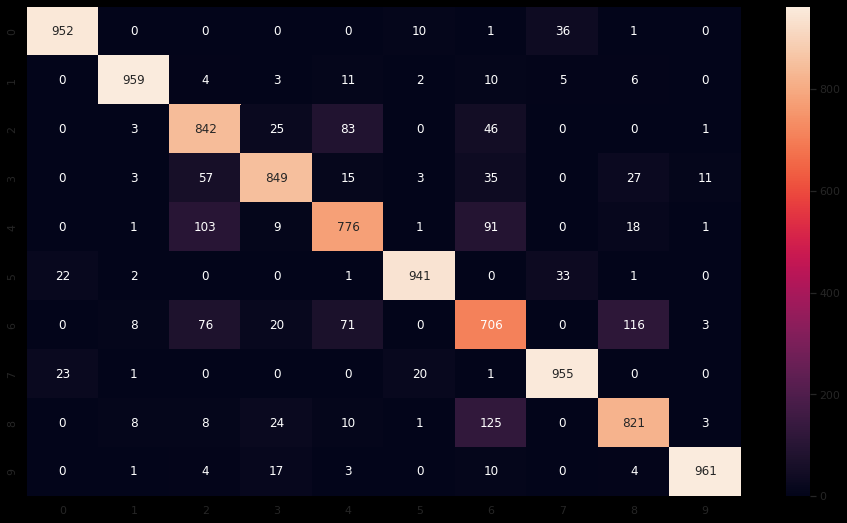

In [66]:
plt.figure(figsize=(16, 9))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'patch.edgecolor': 'w', 'axes.edgecolor': 'black', 'grid.color': 'black',})
sns.heatmap(cm, annot=True, fmt = "d")

Classification Report

In [67]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [np.argmax(i) for i in y_pred], target_names = class_labels)

In [68]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.80      0.78      0.79      1000
       Dress       0.90      0.85      0.87      1000
        Coat       0.77      0.84      0.80      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.69      0.71      0.70      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Save Model

In [69]:
model.save("MNIST_Classifier_NN_Model.h5")

In [70]:
model = keras.models.load_model("MNIST_Classifier_NN_Model.h5")

In [71]:
model.predict(x_test_fs)

array([[7.3158364e-09, 3.7057013e-18, 9.9204591e-09, ..., 4.6356465e-03,
        3.0321335e-08, 9.9536300e-01],
       [9.4067758e-08, 9.8626732e-12, 9.9619472e-01, ..., 3.3898209e-24,
        6.9502367e-16, 3.8137465e-11],
       [9.8716608e-13, 1.0000000e+00, 1.1325956e-37, ..., 0.0000000e+00,
        6.1378300e-13, 0.0000000e+00],
       ...,
       [7.9049223e-15, 4.3943945e-18, 8.4844902e-13, ..., 5.9886353e-11,
        9.9999988e-01, 6.6060869e-25],
       [9.2978814e-10, 1.0000000e+00, 2.5121259e-26, ..., 3.2089282e-27,
        1.8882027e-12, 1.0026795e-34],
       [1.5955433e-06, 7.5450763e-20, 1.4465327e-05, ..., 5.4078479e-05,
        2.2080931e-06, 2.7769556e-08]], dtype=float32)